In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import warnings
import sklearn.exceptions

In [2]:
df= pd.read_csv('/home/root1/Downloads/zoo.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']

In [4]:
df.shape

(101, 18)

In [5]:
x1=df.iloc[:,1:17]
x1.shape

(101, 16)

In [6]:
y1=df.iloc[:,17]
y1.shape

(101,)

In [7]:
#specify the inputs (x = predictors, y = class)
X = df[feature_names]
y = df['class_type'] #there are multiple classes in this column

#split the dataframe into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, test_size=.8)

#specify the model to train with
clf = DecisionTreeClassifier().fit(X_train, y_train)


warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) #ignores warning that tells us dividing by zero equals zero

#let's see how well it worked
pred = clf.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.86

[[31  0  0  0  0  0  1]
 [ 0 17  0  0  0  0  0]
 [ 1  0  0  3  0  0  1]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  1  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  3  3]]

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        32
           2       1.00      1.00      1.00        17
           3       0.00      0.00      0.00         5
           4       0.75      1.00      0.86        12
           5       1.00      0.67      0.80         3
           6       0.62      1.00      0.77         5
           7       0.60      0.43      0.50         7

    accuracy                           0.86        81
   macro avg       0.70      0.72      0.70        81
weighted avg       0.82      0.86      0.83        81



[Text(530.1, 448.47, 'eggs <= 0.5\ngini = 0.725\nsamples = 20\nvalue = [9, 3, 1, 1, 3, 3]\nclass = c'),
 Text(353.40000000000003, 366.93, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0, 0, 0]\nclass = c'),
 Text(706.8000000000001, 366.93, 'legs <= 5.5\ngini = 0.76\nsamples = 11\nvalue = [0, 3, 1, 1, 3, 3]\nclass = l'),
 Text(530.1, 285.39, 'feathers <= 0.5\ngini = 0.688\nsamples = 8\nvalue = [0, 3, 1, 1, 0, 3]\nclass = l'),
 Text(353.40000000000003, 203.84999999999997, 'toothed <= 0.5\ngini = 0.56\nsamples = 5\nvalue = [0, 0, 1, 1, 0, 3]\nclass = _'),
 Text(176.70000000000002, 122.31, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 3]\nclass = _'),
 Text(530.1, 122.31, 'tail <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]\nclass = a'),
 Text(353.40000000000003, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]\nclass = s'),
 Text(706.8000000000001, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = a'),
 Text(706.80000000

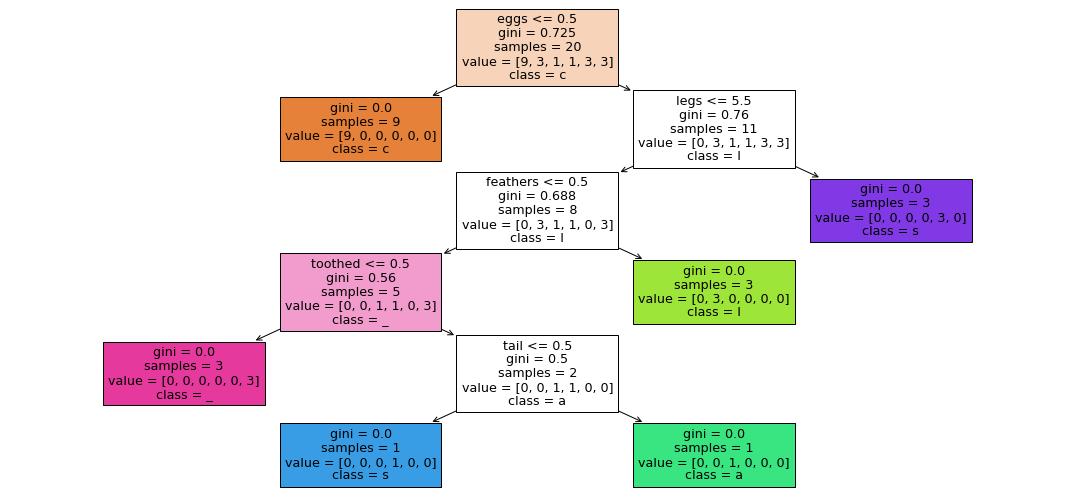

In [20]:
fig = plt.figure(figsize=(19,9))
tree.plot_tree(clf,
               feature_names=feature_names,  
               class_names='class_type',
               filled=True)